# Correctness, difficulty and preferences (about task type and data form presentation)

### Is there a statistically significant difference in the correctness of answers depending on the answers to questions about the preferred type of graphics and graphic form, as well as changes in opinion in these questions before and after the study?

### Is there a statistically significant difference in the assessment of the difficulty of the task depending on the answers to questions about the preferred type of graphics and graphic form, as well as changes in opinion in these questions before and after the study?

In [1]:
import pandas as pd

from functions.set_preparations import prepare_set_changes_questions
from functions.tests.independent_groups.two_groups import chi2_or_fisher_test, mann_whitney_test
from functions.tests.independent_groups.more_than_two_groups import kruskal_wallis_test, chi2_or_chi2_yate_test
from functions.plots import plot_heatmap, plot_multi_boxplot

In [2]:
df_answers = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/correctness.csv',
    usecols=['ID', 'Quest1_before', 'Quest2_before', '1a_corr', '1b_corr', '2a_corr', '2b_corr', '3a_corr', '3b_corr', '1a_trud', '1b_trud', '2a_trud', '2b_trud', '3a_trud', '3b_trud']
)

df_answers = df_answers[df_answers.ID != 6] 

df_quest = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/survey.csv',
    usecols=['ID', 'Quest1_after', 'Quest2_after']
)

df_merge = df_answers.merge(df_quest, on='ID')
df_merge = df_merge[df_merge.ID != 6] 
df_merge.head()

,ID,Quest1_before,Quest2_before,1a_trud,1b_trud,2a_trud,2b_trud,3a_trud,3b_trud,1a_corr,1b_corr,2a_corr,2b_corr,3a_corr,3b_corr,Quest1_after,Quest2_after
0,1,B,wykres,3,1,4,3,4,4,1,1,0,0,1,1,B,wykres
1,2,B,wykres,1,2,3,1,2,4,1,1,1,1,0,1,B,wykres
2,3,B,mapa,2,1,3,1,1,1,1,1,1,1,0,0,B,mapa
3,4,B,mapa,3,2,2,1,3,5,1,1,1,1,1,0,B,wykres
4,5,B,tabela,4,2,3,2,3,3,1,1,1,1,1,1,B,tabela


Each graphic separately: 1a, 1b, 2a, 2b, 3a, 3b

In [3]:
df1a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '1a_corr', '1a_trud']].rename(columns={'1a_corr':'correctness', '1a_trud': 'difficulty'})
df2a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '2a_corr', '2a_trud']].rename(columns={'2a_corr':'correctness', '2a_trud': 'difficulty'})
df3a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '3a_corr', '3a_trud']].rename(columns={'3a_corr':'correctness', '3a_trud': 'difficulty'})

df1b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '1b_corr', '1b_trud']].rename(columns={'1b_corr':'correctness', '1b_trud': 'difficulty'})
df2b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '2b_corr', '2b_trud']].rename(columns={'2b_corr':'correctness', '2b_trud': 'difficulty'})
df3b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '3b_corr', '3b_trud']].rename(columns={'3b_corr':'correctness', '3b_trud': 'difficulty'})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

### 1. Correctness

##### H0: There is no statistically significant difference in the correctness of answers depending on the answers to questions about the preferred type of graphics and graphic form.

##### H1: There is a statistically significant difference in the correctness of answers depending on the answers to questions about the preferred type of graphics and graphic form.

##### Significance level: $\alpha=0.05$

Note:
- Quest1 - question about the preferred type of graphics (with or without redundancy)
- Quest2 - question about the preferred form of graphics (map, table, chart or text)
- before - before the study
- after - after the study

In [4]:
ALPHA = 0.05

In [5]:
# Question 1
for nr, df in enumerate(dfs):
    print('#############################################')
    print(names[nr+1])
    for i in ['Quest1_before', 'Quest1_after']:
        print('----------------')
        print(i)
        chi2_or_fisher_test(df, 'correctness', i, ALPHA)

#############################################
1a:
----------------
Quest1_before
Quest1_before  A   B
correctness         
0              1   4
1              3  32
Fisher test conducted...
Fisher test statistic value: 2.6666666666666665
P-value: 0.42707079549184823
No reason to reject H0, accept H0.
----------------
Quest1_after
Quest1_after  A   B
correctness        
0             4   1
1             7  28
Fisher test conducted...
Fisher test statistic value: 16.0
P-value: 0.015246015246015246
There are grounds to reject H0, accept H1.
#############################################
1b:
----------------
Quest1_before
Quest1_before  A   B
correctness         
0              0   3
1              4  33
Fisher test conducted...
Fisher test statistic value: 0.0
P-value: 1.0
No reason to reject H0, accept H0.
----------------
Quest1_after
Quest1_after  A   B
correctness        
0             2   1
1             9  28
Fisher test conducted...
Fisher test statistic value: 6.222222222222222
P-v

In [6]:
# Question 2
for nr, df in enumerate(dfs):
    print('---------------------------------------------')
    print(names[nr+1])
    for i in ['Quest2_before', 'Quest2_after']:
        print('----------------')
        print(i)
        chi2_or_chi2_yate_test(df, 'correctness', i, alpha=ALPHA)

---------------------------------------------
1a:
----------------
Quest2_before
Quest2_before  mapa  tabela  tekst  wykres
correctness                               
0                 3       1      0       1
1                18       6      3       8
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 0.526077097505669
P-value: 0.9131261529010268
No reason to reject H0, accept H0.
----------------
Quest2_after
Quest2_after  mapa  tabela  tekst  wykres
correctness                              
0                5       0      0       0
1               13       6      1      15
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 6.984126984126984
P-value: 0.07240542401850052
No reason to reject H0, accept H0.
---------------------------------------------
1b:
----------------
Quest2_before
Quest2_before  mapa  tabela  tekst  wykres
correctness                               
0                 1       1      0       1
1               

### Summary:
There is a statistically significant relationship between the correctness of the answer and the answer to the question about the preferred graphic form at the level of significance $\alpha=0.05$ for:
- graphic 1a, quest1_after
- graphic 3b, quest2_after

### 2. Difficulty

##### H0: There is no statistically significant difference in the assessment of the difficulty of the task depending on the answers to questions about the preferred type of graphics and graphic form.

##### H1: There is a statistically significant difference in the assessment of the difficulty of the task depending on the answers to questions about the preferred type of graphics and graphic form.

##### Significance level: $\alpha=0.05$

In [7]:
# Question 1
for nr, df in enumerate(dfs):
    print('#############################################')
    print(names[nr+1])
    for i in ['Quest1_before', 'Quest1_after']:
        print('----------------')
        print(i)
        mann_whitney_test([df['difficulty'][df[i] == 'A'], df['difficulty'][df[i] == 'B']], print_flag=True, alpha=ALPHA)

#############################################
1a:
----------------
Quest1_before
U-statistic: 73.5
p-value: 0.9622734753395483
No reason to reject H0, accept H0.
----------------
Quest1_after
U-statistic: 176.0
p-value: 0.6111162097289846
No reason to reject H0, accept H0.
#############################################
1b:
----------------
Quest1_before
U-statistic: 99.0
p-value: 0.19598768101658237
No reason to reject H0, accept H0.
----------------
Quest1_after
U-statistic: 227.0
p-value: 0.02805441981574861
There are grounds to reject H0, accept H1.
#############################################
2a:
----------------
Quest1_before
U-statistic: 67.0
p-value: 0.8322242496571796
No reason to reject H0, accept H0.
----------------
Quest1_after
U-statistic: 179.5
p-value: 0.537374516799005
No reason to reject H0, accept H0.
#############################################
2b:
----------------
Quest1_before
U-statistic: 43.0
p-value: 0.17884156309752575
No reason to reject H0, accept H0.
------

In [8]:
# Question 2
col = 'difficulty'
for nr, df in enumerate(dfs):
    print('#############################################')
    print(names[nr+1])
    for i in ['Quest2_before', 'Quest2_after']:
        print('----------------')
        print(i)
        map = df[col][df[i] == 'mapa']
        tab = df[col][df[i] == 'tabela']
        text = df[col][df[i] == 'tekst']
        plot = df[col][df[i] == 'wykres']
        kruskal_wallis_test([map, tab, text, plot], print_flag=True, alpha=ALPHA)

#############################################
1a:
----------------
Quest2_before
H: 12.541659290729926
p-value: 0.005740310433430476
There are grounds to reject H0, accept H1.
----------------
Quest2_after
H: 2.4634534627564486
p-value: 0.48193208148204614
No reason to reject H0, accept H0.
#############################################
1b:
----------------
Quest2_before
H: 0.9518367346938728
p-value: 0.812903748809716
No reason to reject H0, accept H0.
----------------
Quest2_after
H: 8.787047619047652
p-value: 0.032260375757736735
There are grounds to reject H0, accept H1.
#############################################
2a:
----------------
Quest2_before
H: 0.33922239108410346
p-value: 0.9524906277505929
No reason to reject H0, accept H0.
----------------
Quest2_after
H: 2.3709219858156003
p-value: 0.49907043739483936
No reason to reject H0, accept H0.
#############################################
2b:
----------------
Quest2_before
H: 0.8505706657277686
p-value: 0.8373368070306039
No re

### Summary:
There is a statistically significant relationship between the assessment of the difficulty of the task and the answer to the question about the preferred graphic form at the level of significance $\alpha=0.05$ for:
- 1a (quest2_after)
- 1b (quest1_after, quest2_after)
- 3a (quest1_after, quest2_after)

### Plots

Correctness

-------------------------------------
1a:


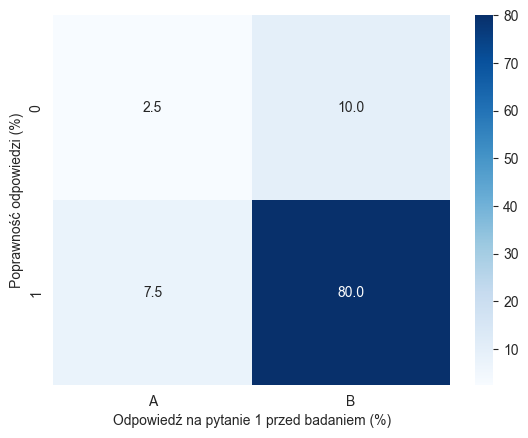

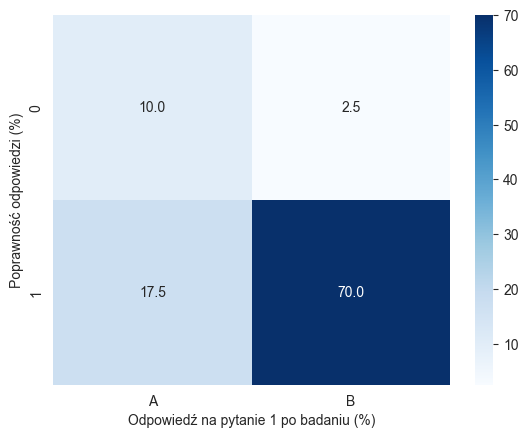

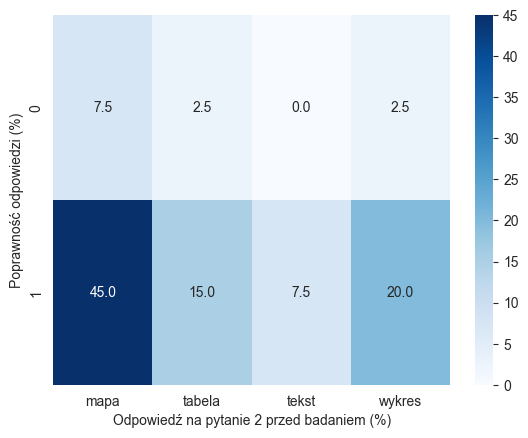

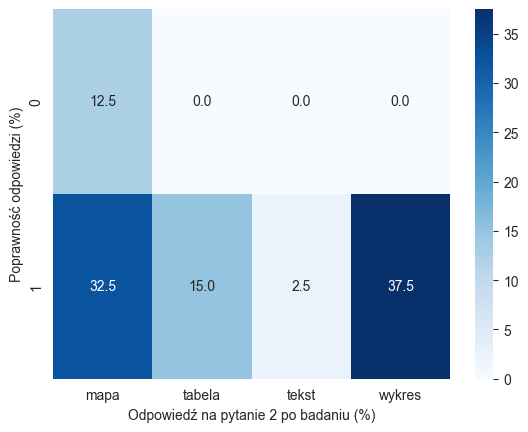

-------------------------------------
1b:


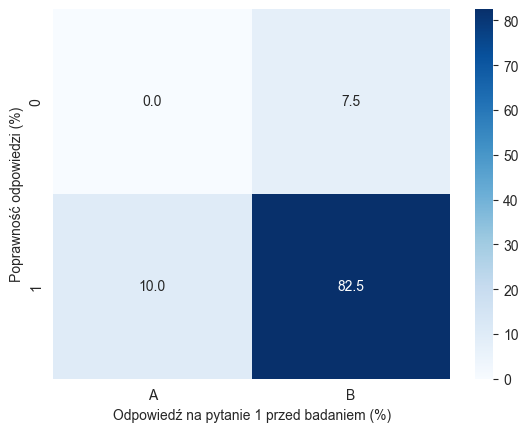

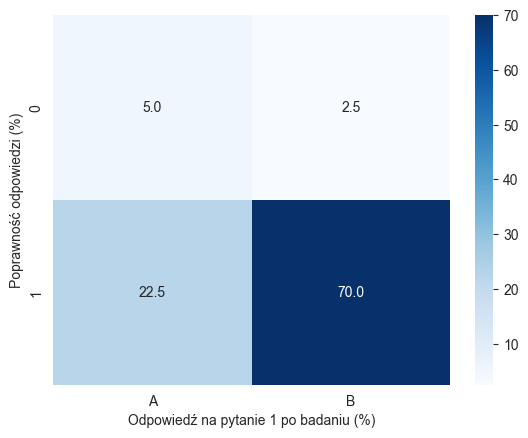

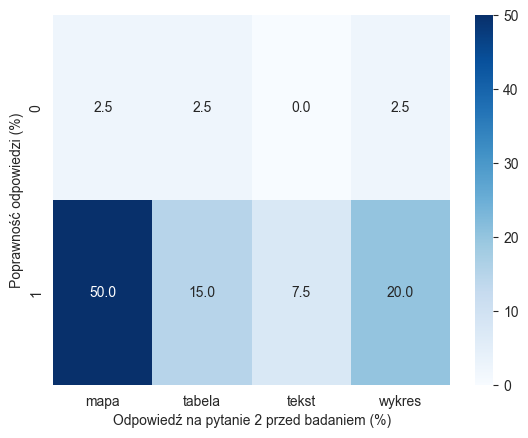

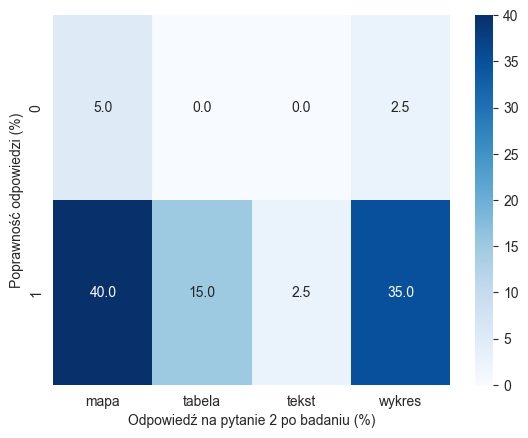

-------------------------------------
2a:


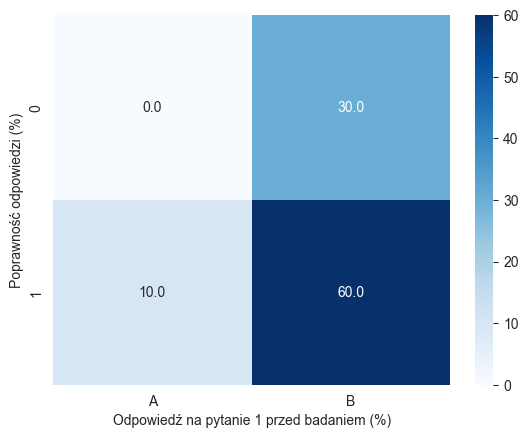

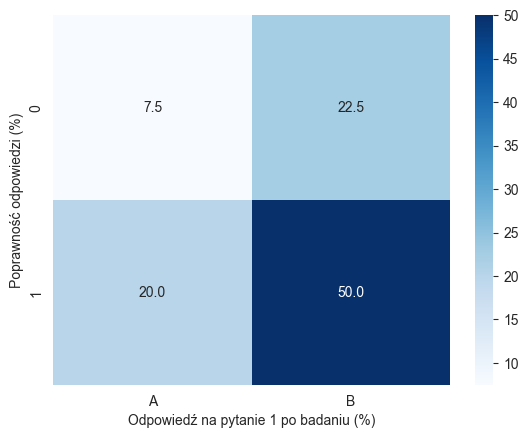

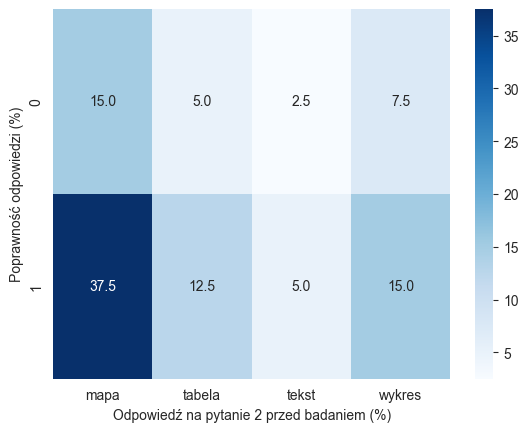

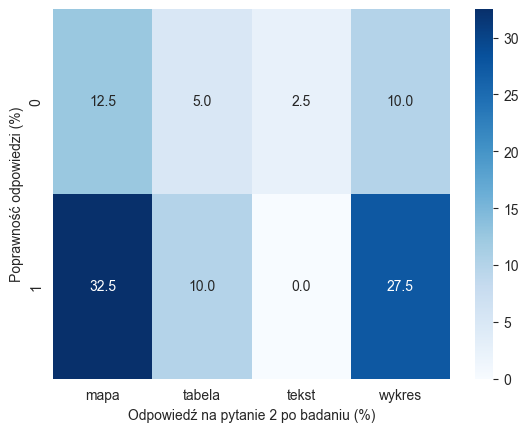

-------------------------------------
2b:


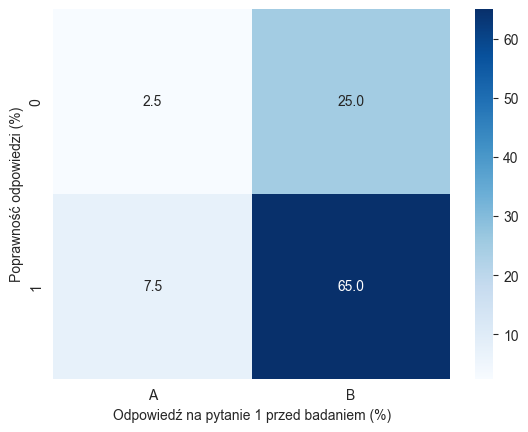

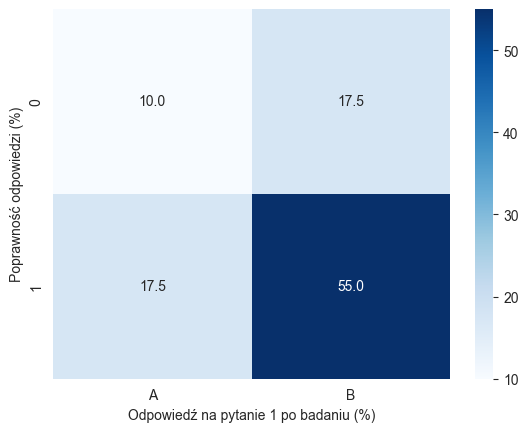

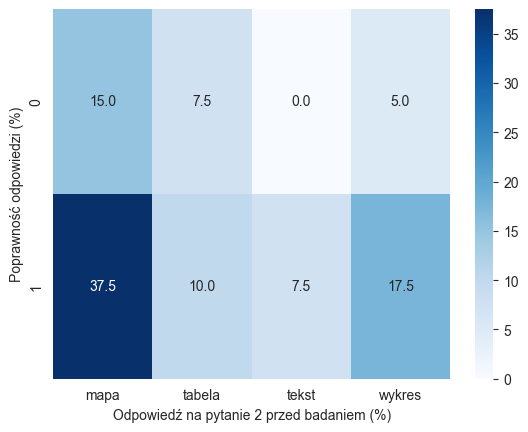

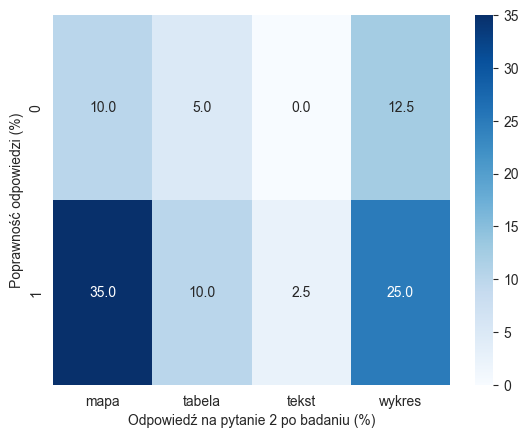

-------------------------------------
3a:


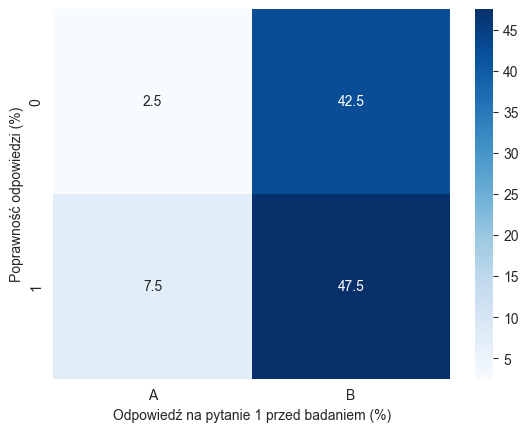

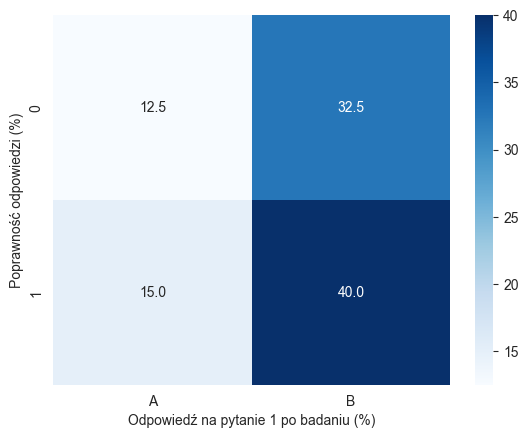

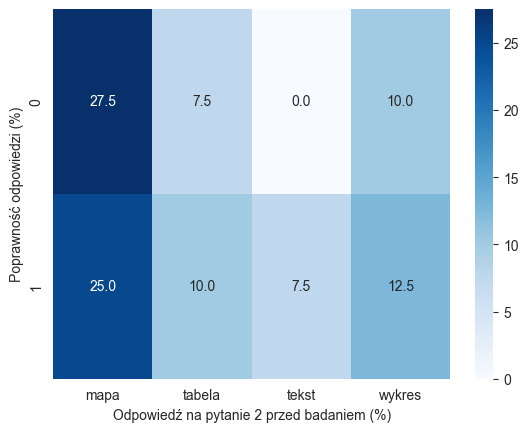

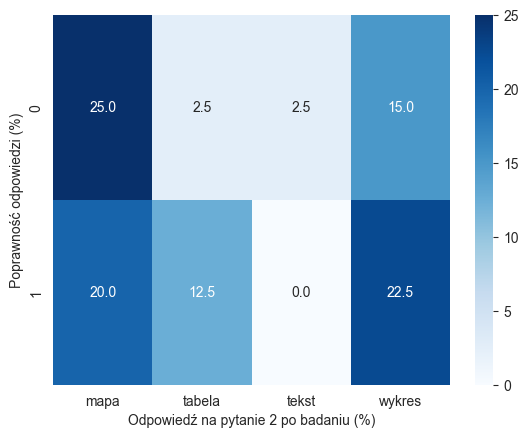

-------------------------------------
3b:


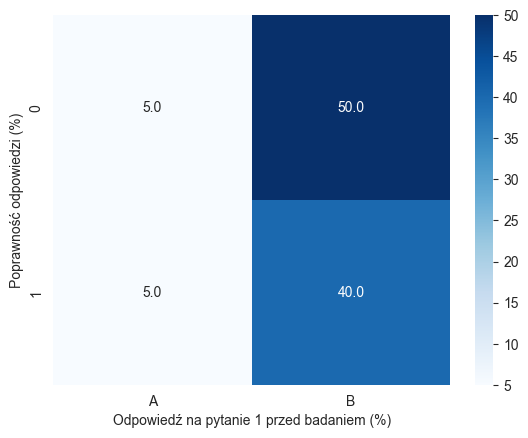

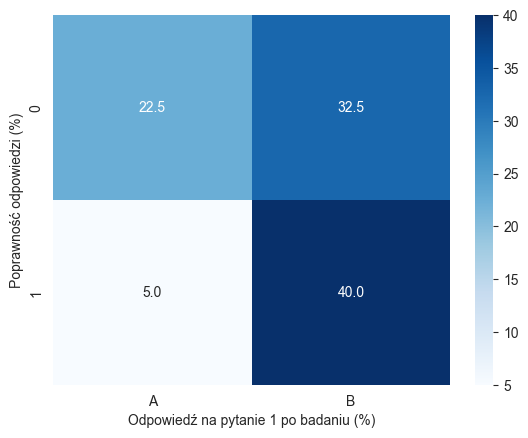

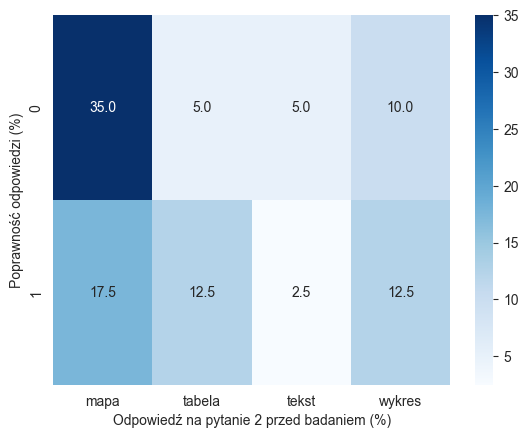

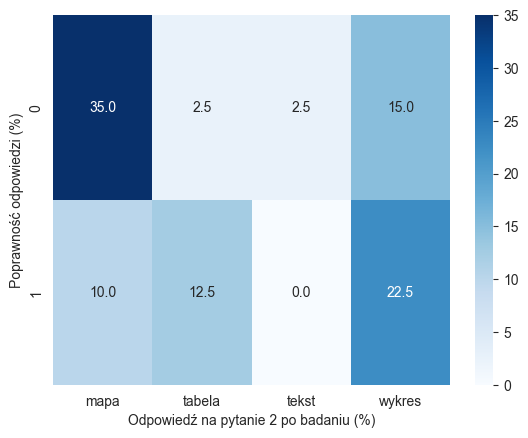

In [9]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])

    plot_heatmap(df, 'correctness', 'Quest1_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 przed badaniem', cmap='Blues')
    plot_heatmap(df, 'correctness', 'Quest1_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 1 po badaniu', cmap='Blues')
    plot_heatmap(df, 'correctness', 'Quest2_before', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 przed badaniem', cmap='Blues')
    plot_heatmap(df, 'correctness', 'Quest2_after', 'Poprawność odpowiedzi', 'Odpowiedź na pytanie 2 po badaniu', cmap='Blues')

Difficulty

-------------------------------------
1a:


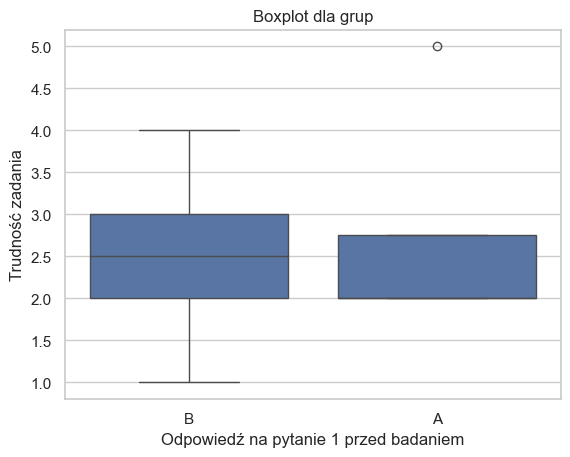

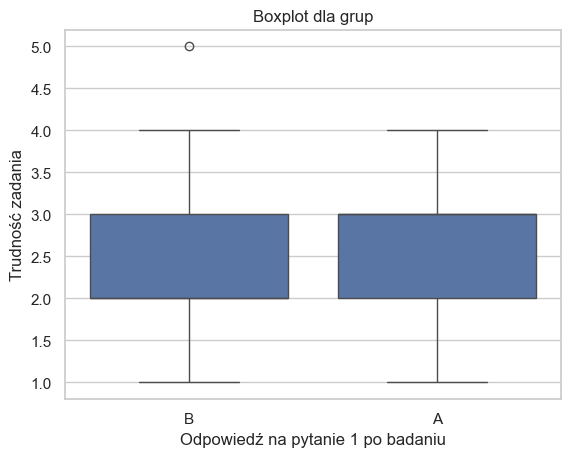

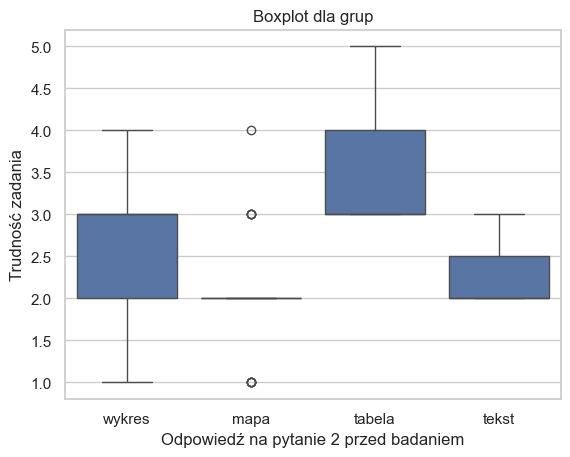

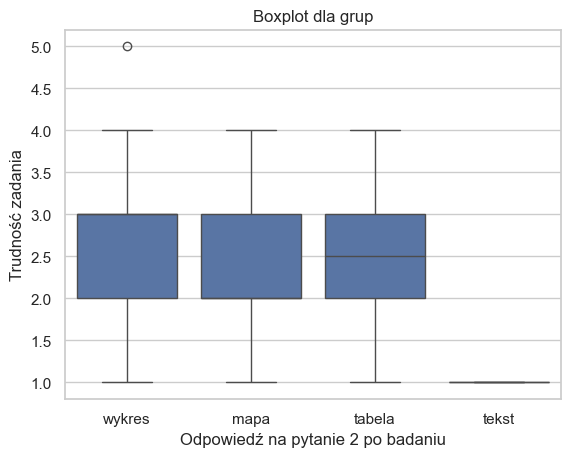

-------------------------------------
1b:


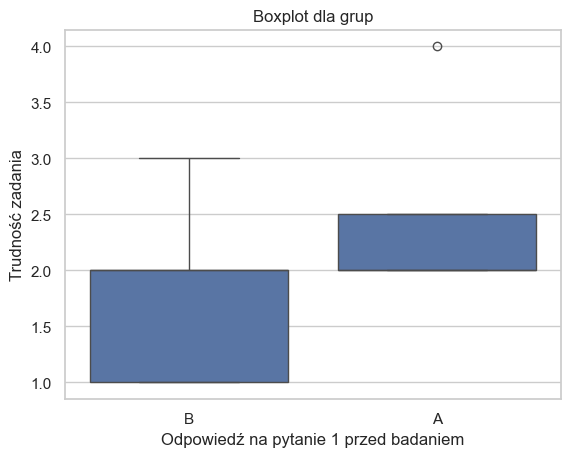

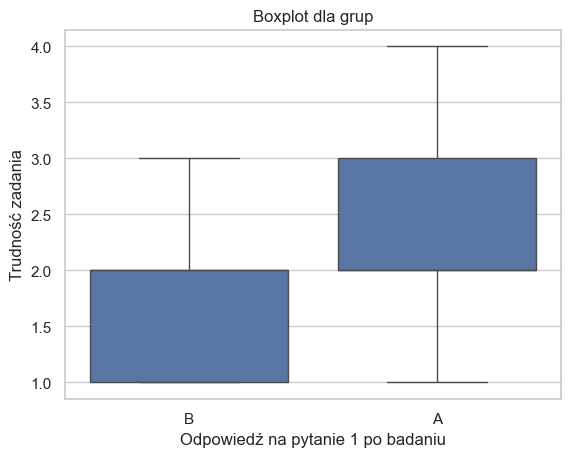

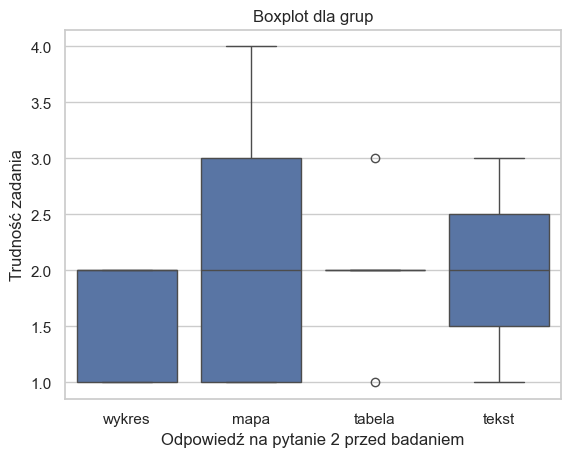

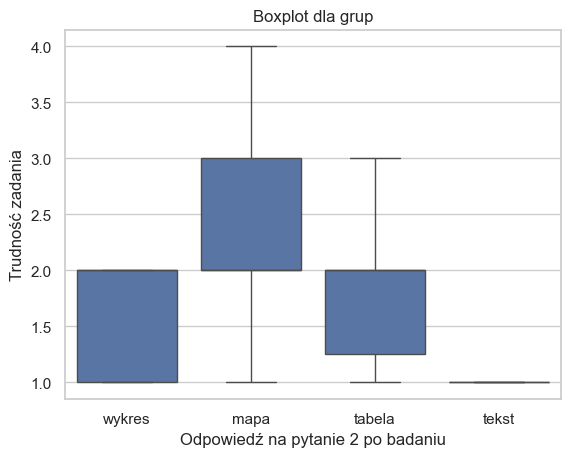

-------------------------------------
2a:


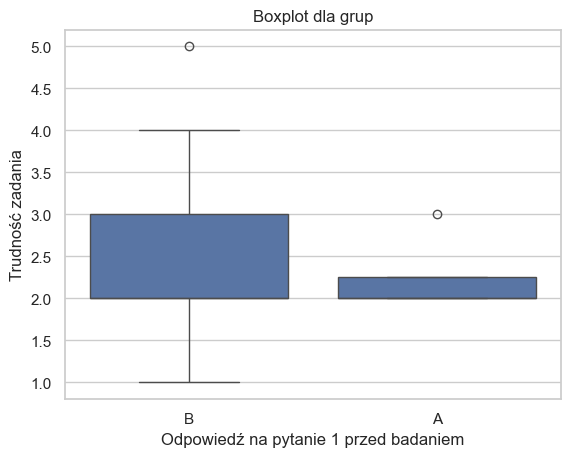

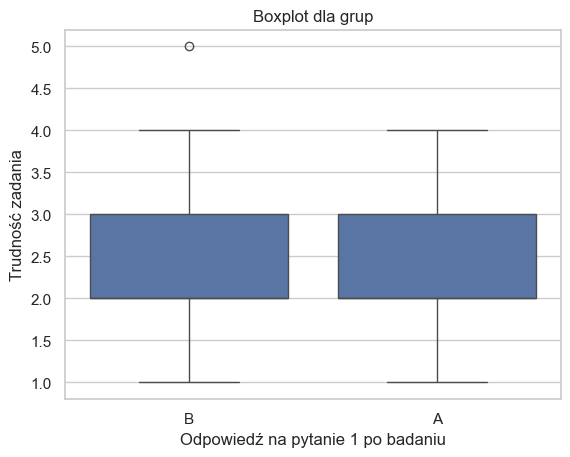

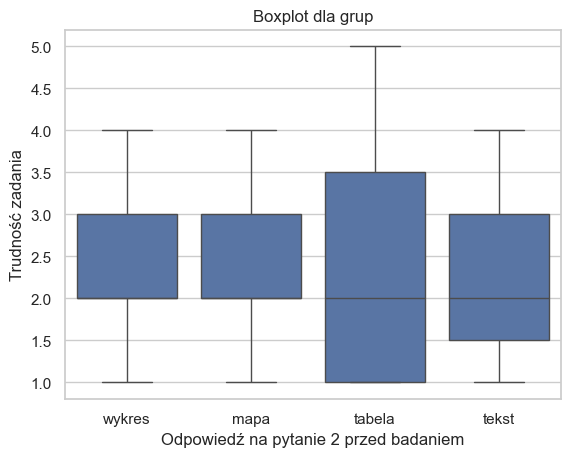

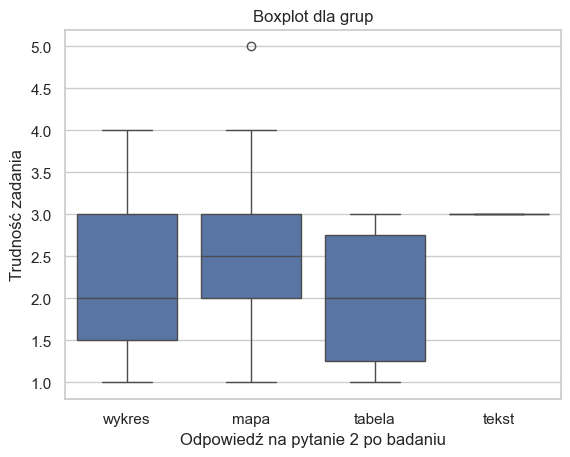

-------------------------------------
2b:


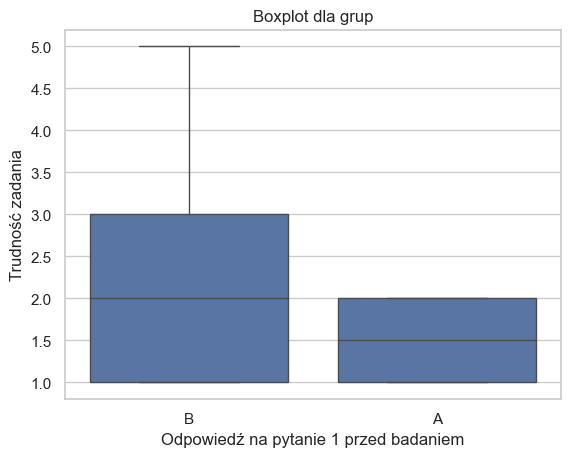

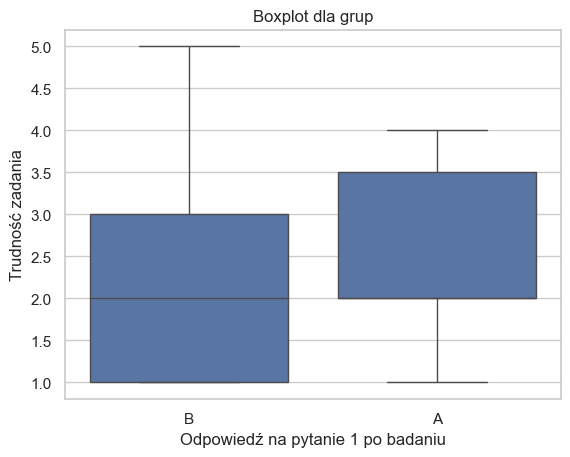

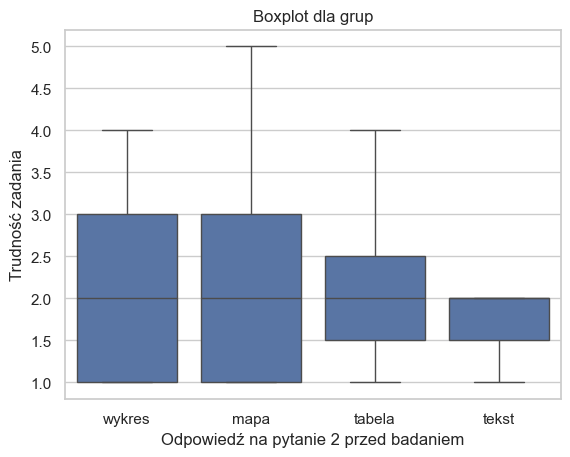

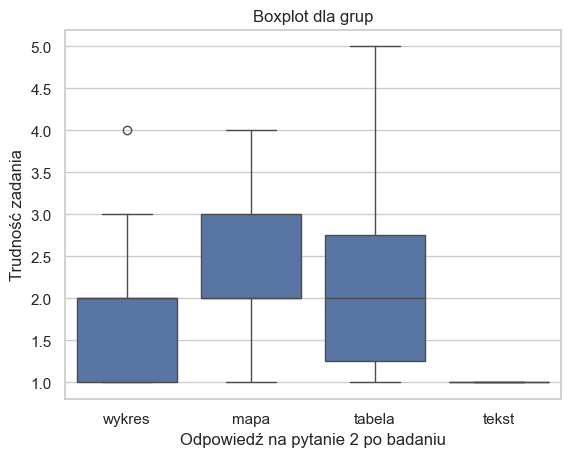

-------------------------------------
3a:


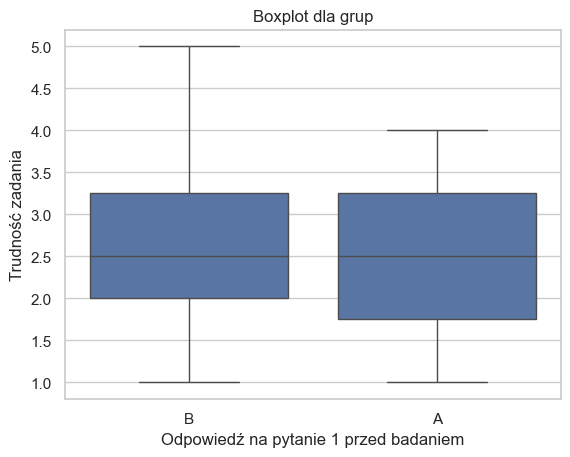

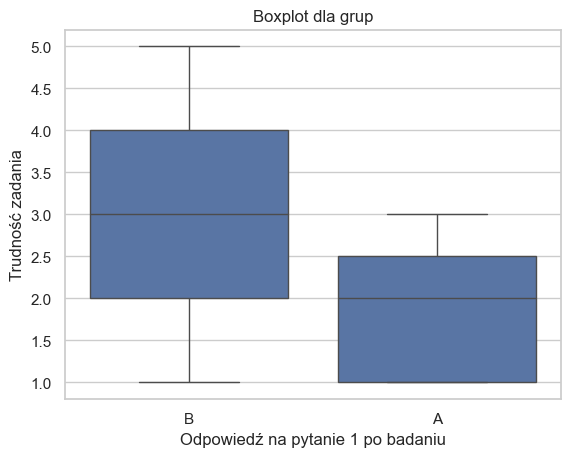

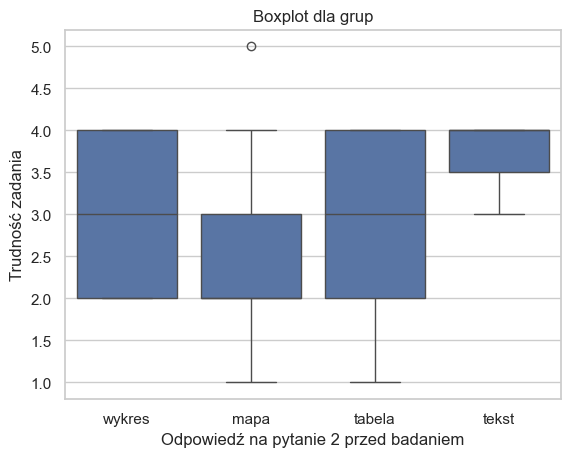

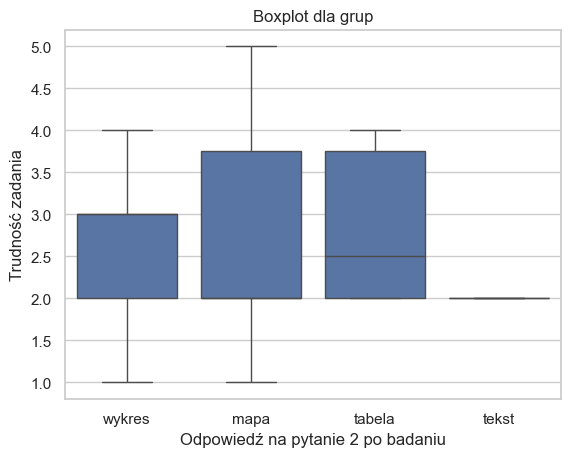

-------------------------------------
3b:


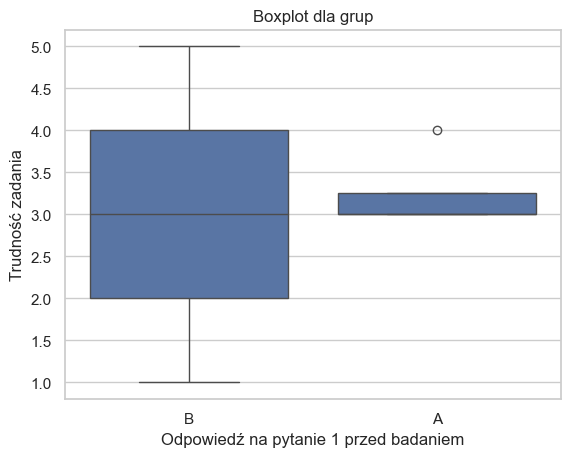

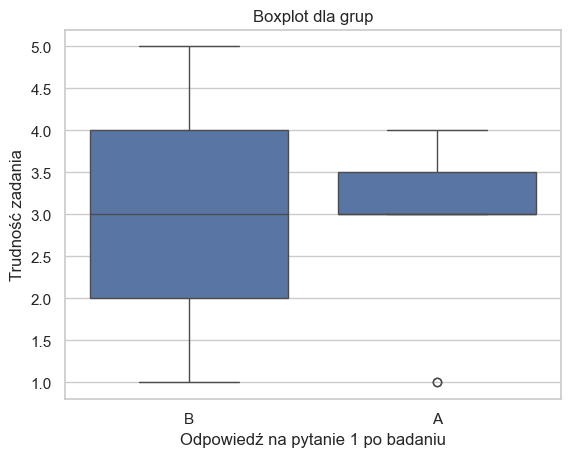

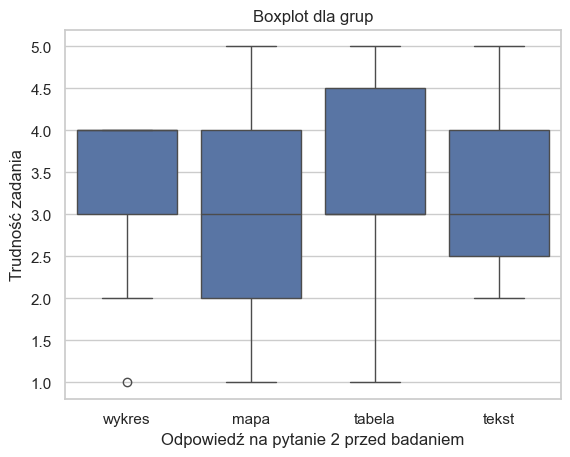

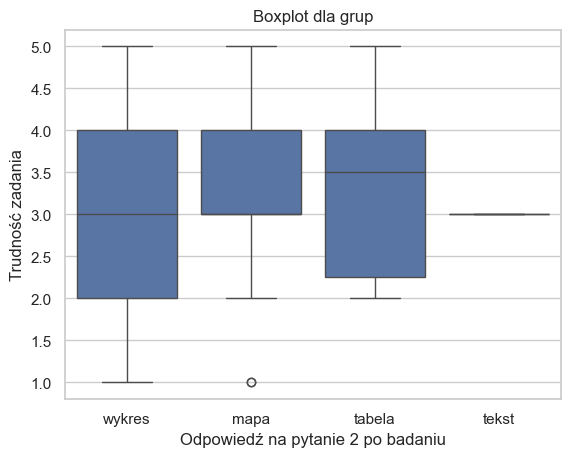

In [10]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])

    plot_multi_boxplot(df, 'Quest1_before', 'difficulty', 'Odpowiedź na pytanie 1 przed badaniem', 'Trudność zadania')
    plot_multi_boxplot(df, 'Quest1_after', 'difficulty', 'Odpowiedź na pytanie 1 po badaniu', 'Trudność zadania')
    plot_multi_boxplot(df, 'Quest2_before', 'difficulty', 'Odpowiedź na pytanie 2 przed badaniem', 'Trudność zadania')
    plot_multi_boxplot(df, 'Quest2_after', 'difficulty', 'Odpowiedź na pytanie 2 po badaniu', 'Trudność zadania')

### Analysis - people who changed their minds vs people who remained with their opinion

In [11]:
df_merge['is_change_1'] = df_merge.apply(lambda row: row['Quest1_before'] != row['Quest1_after'], axis=1)
df_merge['is_change_2'] = df_merge.apply(lambda row: row['Quest2_before'] != row['Quest2_after'], axis=1)

df_merge.to_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/quest12.csv')

### 1. Correctness

##### H0: There is no statistically significant relationship between the correctness of the answer and the change of opinion in questions 1/2.

##### H1: There is a statistically significant relationship between the correctness of the answer and the change of opinion in questions 1/2.

##### Significance level: $\alpha=0.05$

Note:
- is_change_1 - change of opinion in question 1
- is_change_2 - change of opinion in question 2


In [12]:
col = 'correctness'
c = 'corr'
label_col = 'Poprawność odpowiedzi'
label_quest = 'Zmiana zdania'

1a:
----------------
quest1
quest1       False  True
correctness             
0                2     3
1               29     6
Fisher test conducted...
Fisher test statistic value: 0.13793103448275862
P-value: 0.06548856548856549
No reason to reject H0, accept H0.


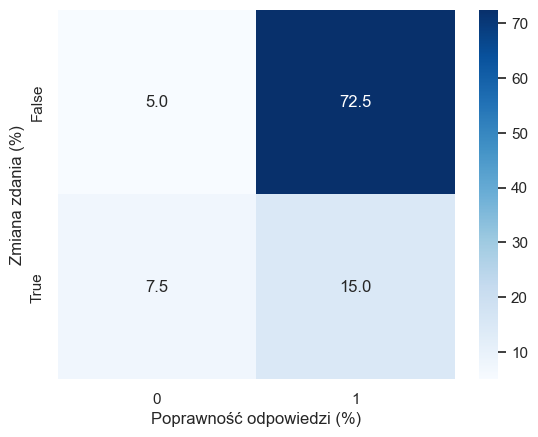

----------------
quest2
quest2       False  True
correctness             
0                3     2
1               13    22
Fisher test conducted...
Fisher test statistic value: 2.5384615384615383
P-value: 0.37250610934821454
No reason to reject H0, accept H0.


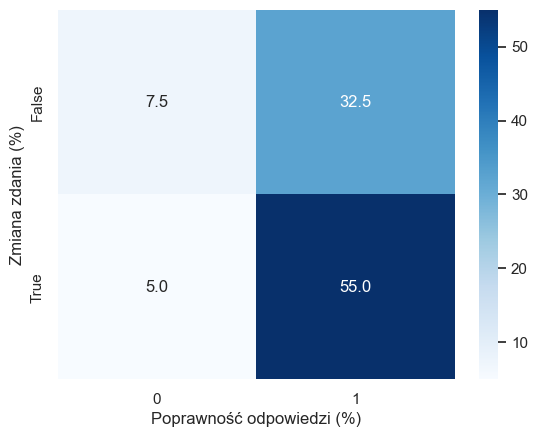

In [13]:
print('1a:')
df = prepare_set_changes_questions([df_merge[f'1a_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    chi2_or_fisher_test(df, col, i, alpha=ALPHA)
    plot_heatmap(df, i, col, label_quest, label_col, cmap='Blues')

1b:
----------------
quest1
quest1       False  True
correctness             
0                1     2
1               30     7
Fisher test conducted...
Fisher test statistic value: 0.11666666666666667
P-value: 0.12145748987854249
No reason to reject H0, accept H0.


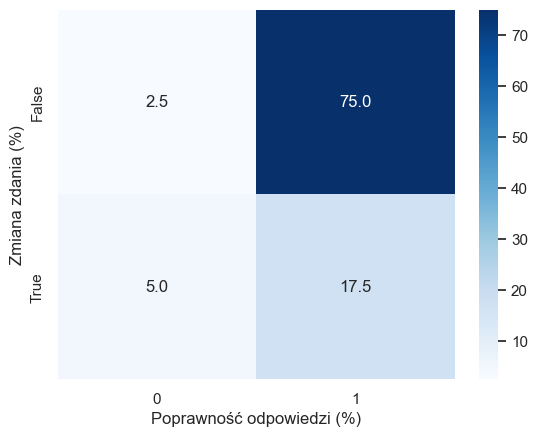

----------------
quest2
quest2       False  True
correctness             
0                0     3
1               16    21
Fisher test conducted...
Fisher test statistic value: 0.0
P-value: 0.26153846153846155
No reason to reject H0, accept H0.


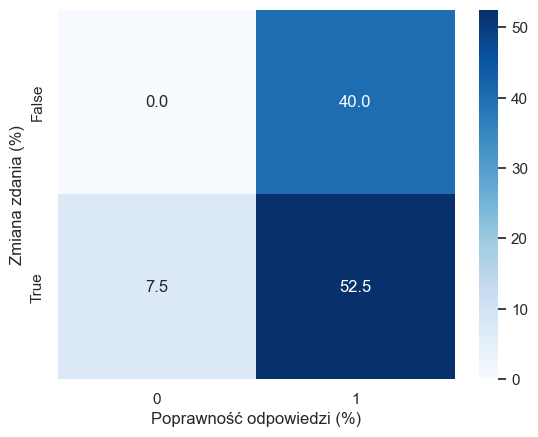

In [14]:
print('1b:')
df = prepare_set_changes_questions([df_merge[f'1b_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    chi2_or_fisher_test(df, col, i, alpha=ALPHA)
    plot_heatmap(df, i, col, label_quest, label_col, cmap='Blues')

2a:
----------------
quest1
quest1       False  True
correctness             
0                9     3
1               22     6
Fisher test conducted...
Fisher test statistic value: 0.8181818181818182
P-value: 1.0
No reason to reject H0, accept H0.


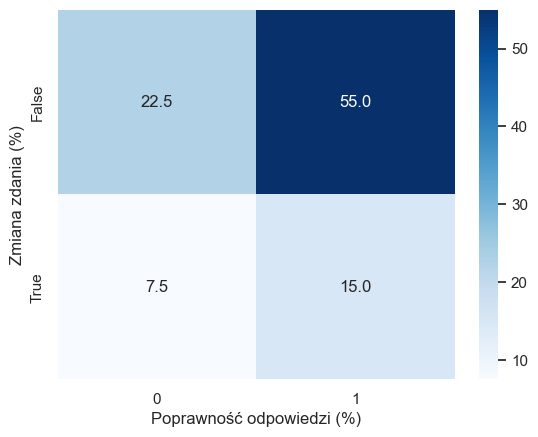

----------------
quest2
quest2       False  True
correctness             
0                3     9
1               13    15
Fisher test conducted...
Fisher test statistic value: 0.38461538461538464
P-value: 0.2968879040658141
No reason to reject H0, accept H0.


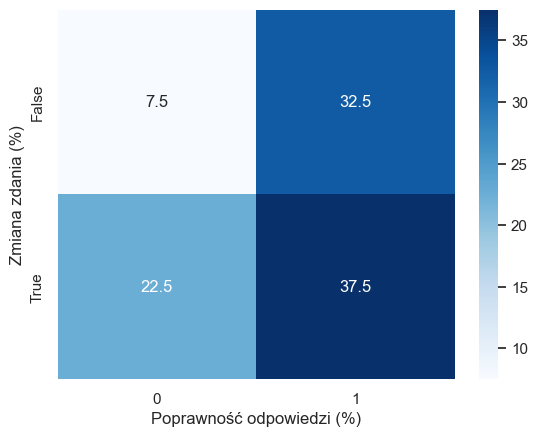

In [15]:
print('2a:')
df = prepare_set_changes_questions([df_merge[f'2a_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    chi2_or_fisher_test(df, col, i, alpha=ALPHA)
    plot_heatmap(df, i, col, label_quest, label_col, cmap='Blues')

2b:
----------------
quest1
quest1       False  True
correctness             
0                8     3
1               23     6
Fisher test conducted...
Fisher test statistic value: 0.6956521739130435
P-value: 0.6860618358296376
No reason to reject H0, accept H0.


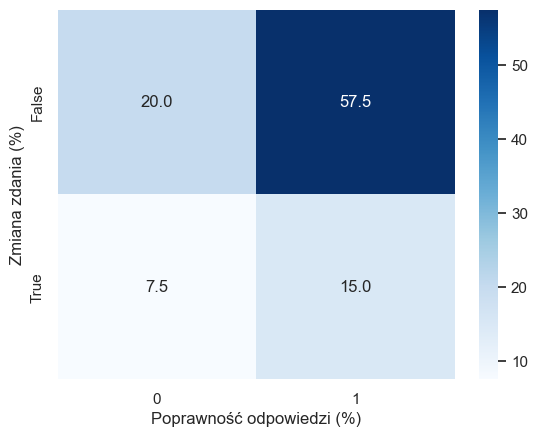

----------------
quest2
quest2       False  True
correctness             
0                2     9
1               14    15
Fisher test conducted...
Fisher test statistic value: 0.23809523809523808
P-value: 0.14782456403349242
No reason to reject H0, accept H0.


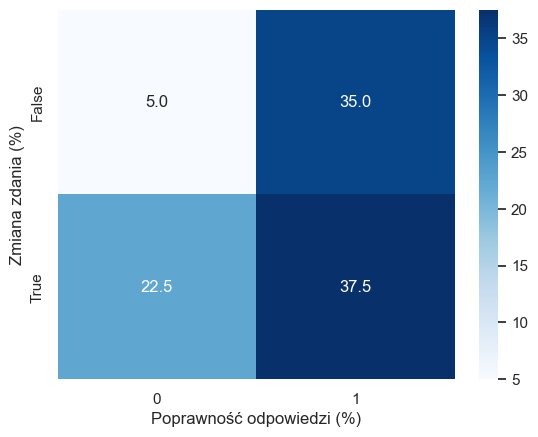

In [16]:
print('2b:')
df = prepare_set_changes_questions([df_merge[f'2b_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    chi2_or_fisher_test(df, col, i, alpha=ALPHA)
    plot_heatmap(df, i, col, label_quest, label_col, cmap='Blues')

3a:
----------------
quest1
quest1       False  True
correctness             
0               14     4
1               17     5
Fisher test conducted...
Fisher test statistic value: 1.0294117647058822
P-value: 1.0
No reason to reject H0, accept H0.


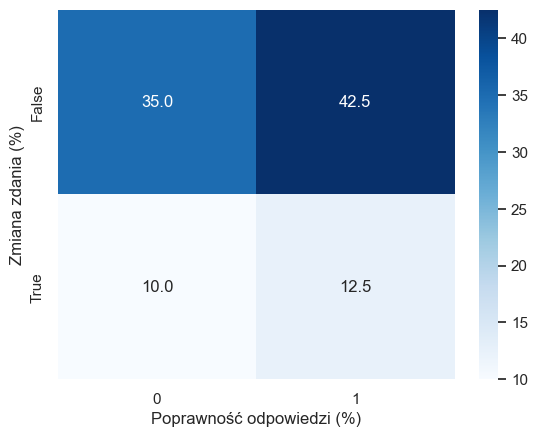

----------------
quest2
quest2       False  True
correctness             
0                8    10
1                8    14
Chi2 test conducted...
Chi-squared test statistic value: 0.26936026936026963
P-value: 0.6037612321081911
No reason to reject H0, accept H0.


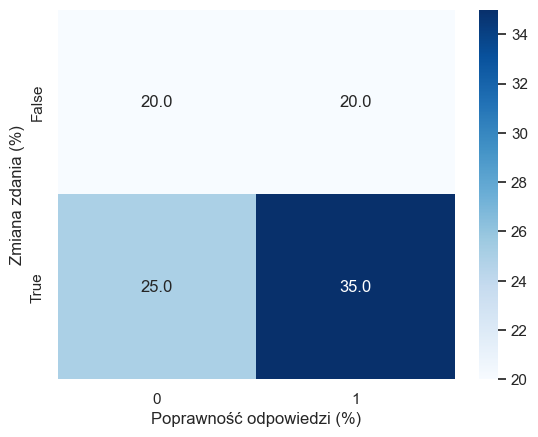

In [17]:
print('3a:')
df = prepare_set_changes_questions([df_merge[f'3a_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    chi2_or_fisher_test(df, col, i, alpha=ALPHA)
    plot_heatmap(df, i, col, label_quest, label_col, cmap='Blues')

3b:
----------------
quest1
quest1       False  True
correctness             
0               15     7
1               16     2
Fisher test conducted...
Fisher test statistic value: 0.26785714285714285
P-value: 0.1488784330889594
No reason to reject H0, accept H0.


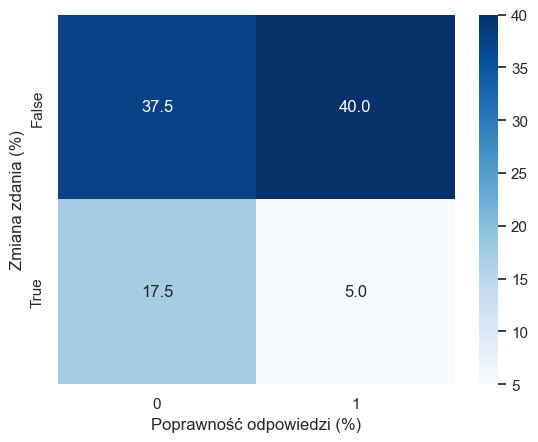

----------------
quest2
quest2       False  True
correctness             
0               10    12
1                6    12
Chi2 test conducted...
Chi-squared test statistic value: 0.6060606060606056
P-value: 0.4362749288405292
No reason to reject H0, accept H0.


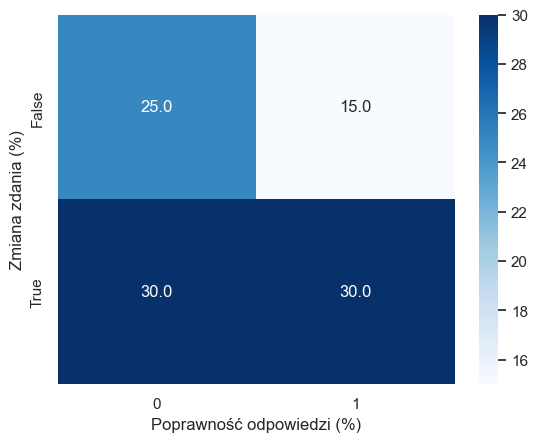

In [18]:
print('3b:')
df = prepare_set_changes_questions([df_merge[f'3b_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    chi2_or_fisher_test(df, col, i, alpha=ALPHA)
    plot_heatmap(df, i, col, label_quest, label_col, cmap='Blues')

### Summary:
Changing the opinion did not affect the correctness of the answer in a statistically significant way.

### 2. Difficulty

##### H0: There is no statistically significant relationship between the assessment of the difficulty of the task and the change of opinion in questions 1/2.

##### H1: There is a statistically significant relationship between the assessment of the difficulty of the task and the change of opinion in questions 1/2.

##### Significance level: $\alpha=0.05$

In [19]:
col = 'difficulty'
c = 'trud'
label_col = 'Trudność zadania'
label_quest = 'Zmiana zdania'

1a:
----------------
quest1
U-statistic: 193.5
p-value: 0.06905920114544387
No reason to reject H0, accept H0.


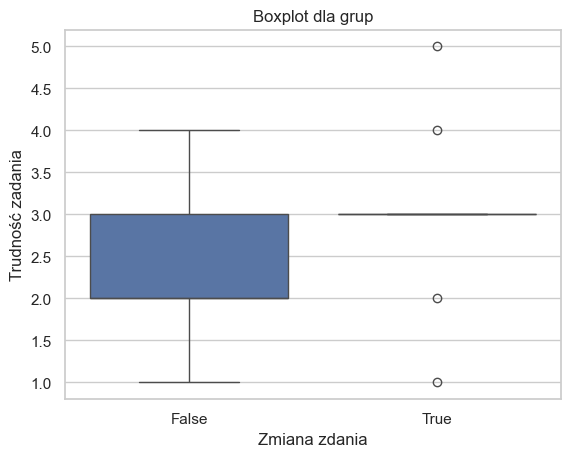

----------------
quest2
U-statistic: 219.0
p-value: 0.4427299017788052
No reason to reject H0, accept H0.


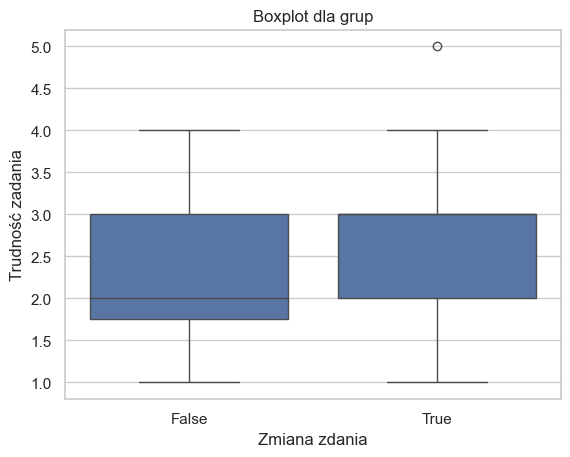

In [20]:
print('1a:')
df = prepare_set_changes_questions([df_merge[f'1a_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    mann_whitney_test([df[col][df[i] == True], df[col][df[i] == False]], print_flag=True, alpha=ALPHA)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

1b:
----------------
quest1
U-statistic: 185.0
p-value: 0.11468248877800034
No reason to reject H0, accept H0.


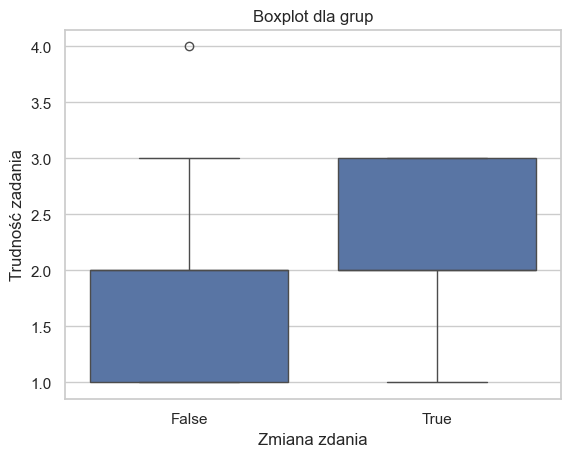

----------------
quest2
U-statistic: 147.0
p-value: 0.1836198284832813
No reason to reject H0, accept H0.


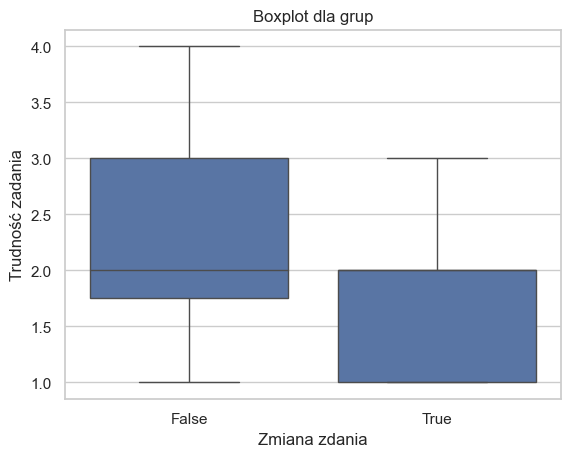

In [21]:
print('1b:')
df = prepare_set_changes_questions([df_merge[f'1b_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    mann_whitney_test([df[col][df[i] == True], df[col][df[i] == False]], print_flag=True, alpha=ALPHA)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

2a:
----------------
quest1
U-statistic: 155.5
p-value: 0.6001148614261298
No reason to reject H0, accept H0.


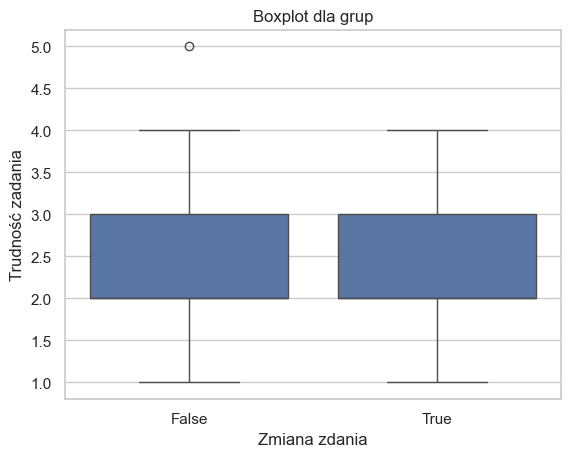

----------------
quest2
U-statistic: 152.5
p-value: 0.2608709738847239
No reason to reject H0, accept H0.


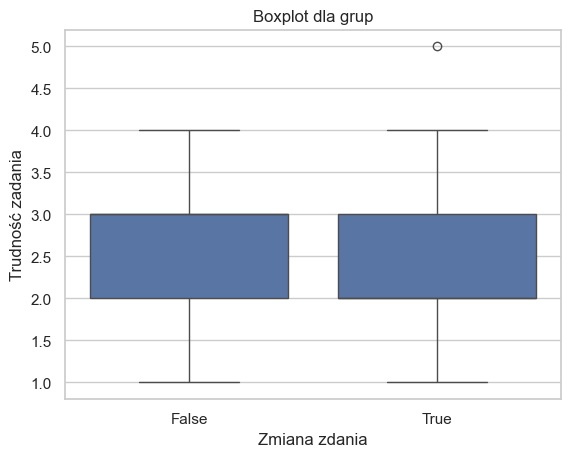

In [22]:
print('2a:')
df = prepare_set_changes_questions([df_merge[f'2a_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    mann_whitney_test([df[col][df[i] == True], df[col][df[i] == False]], print_flag=True, alpha=ALPHA)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

2b:
----------------
quest1
U-statistic: 181.0
p-value: 0.16471419119319075
No reason to reject H0, accept H0.


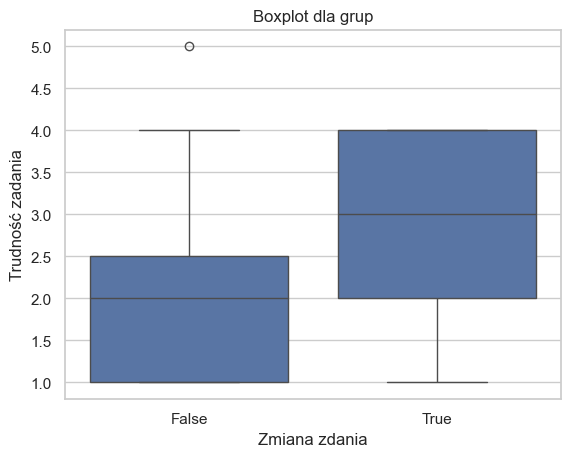

----------------
quest2
U-statistic: 189.5
p-value: 0.9539313656200814
No reason to reject H0, accept H0.


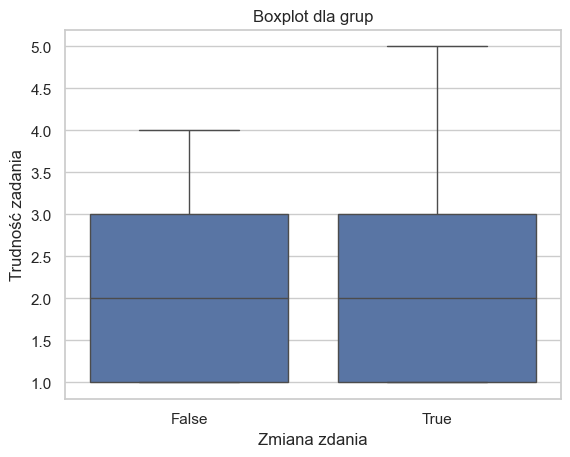

In [23]:
print('2b:')
df = prepare_set_changes_questions([df_merge[f'2b_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    mann_whitney_test([df[col][df[i] == True], df[col][df[i] == False]], print_flag=True, alpha=ALPHA)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

3a:
----------------
quest1
U-statistic: 95.0
p-value: 0.1402899652297783
No reason to reject H0, accept H0.


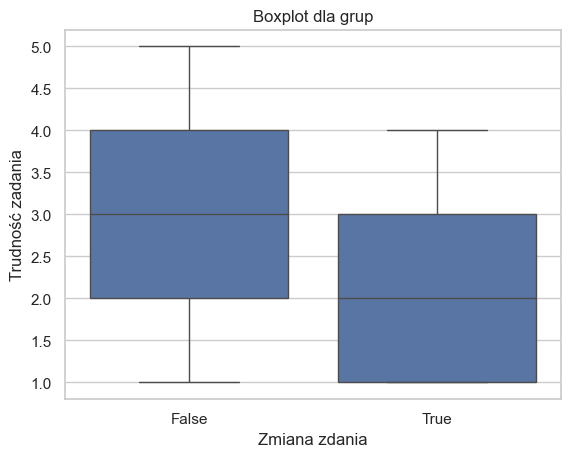

----------------
quest2
U-statistic: 212.0
p-value: 0.5774656755435009
No reason to reject H0, accept H0.


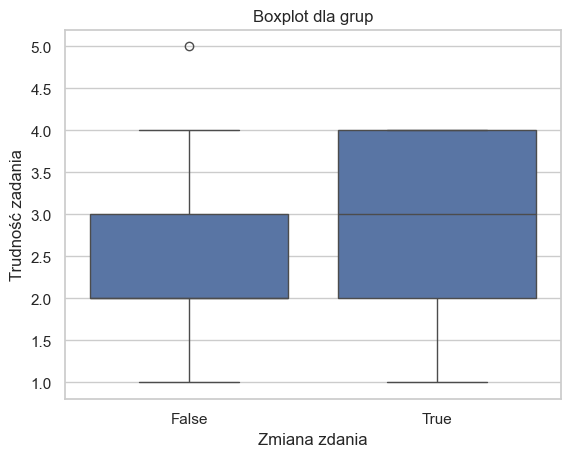

In [24]:
print('3a:')
df = prepare_set_changes_questions([df_merge[f'3a_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    mann_whitney_test([df[col][df[i] == True], df[col][df[i] == False]], print_flag=True, alpha=ALPHA)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

3b:
----------------
quest1
U-statistic: 136.0
p-value: 0.9198245151530903
No reason to reject H0, accept H0.


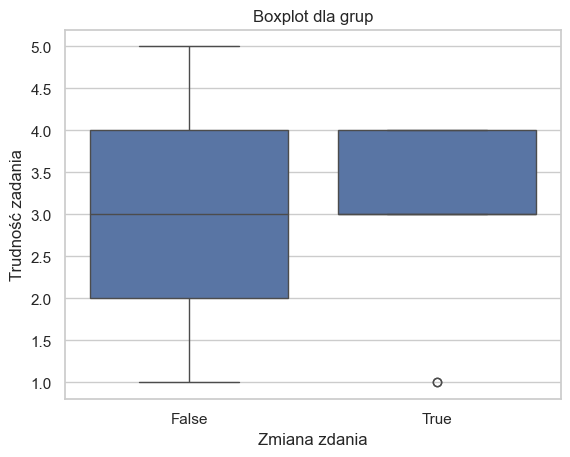

----------------
quest2
U-statistic: 172.0
p-value: 0.577063663805738
No reason to reject H0, accept H0.


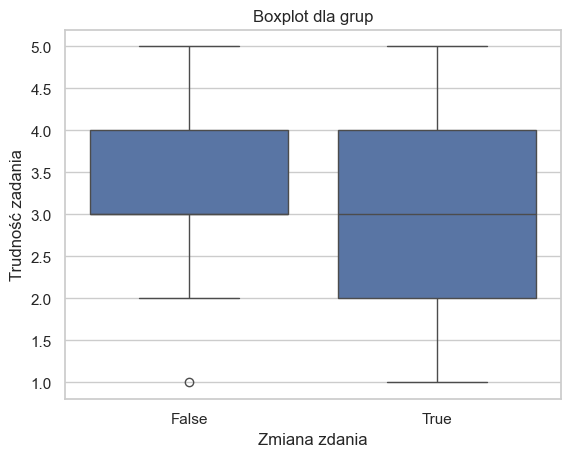

In [25]:
print('3b:')
df = prepare_set_changes_questions([df_merge[f'3b_{c}']], [df_merge['is_change_1']], [df_merge['is_change_2']], col)

for i in ['quest1', 'quest2']:
    print('----------------')
    print(i)
    mann_whitney_test([df[col][df[i] == True], df[col][df[i] == False]], print_flag=True, alpha=ALPHA)
    plot_multi_boxplot(df, i, col, label_quest, label_col)

### Summary:
Changing the opinion did not affect the assessment of the difficulty of the task in a statistically significant way.